## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [60]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__


**Creación de objetos:** 

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [61]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [62]:
# tipo de datos
x.dtype

dtype('float64')

In [63]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1


dtype('<U1')

In [64]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [65]:
# También se puede utilizar
x[0][0]

1.0

In [66]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

In [67]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [68]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

In [69]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [70]:
# Extraer la submatriz columnas 2 y 4
x_new=x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

In [71]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3
x[:,[0,2]]

array([[ 1.,  3.],
       [ 5.,  7.],
       [ 9., 11.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype* 

In [72]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),   
    }
)

In [73]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [74]:
df.dtypes

A     float64
B    category
C     float64
dtype: object

In [75]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


In [76]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria
# y el número de habitantes separados por géneros (Masculino, Femenino, etc...)
df_municipios = pd.DataFrame(
    {"Municipios": pd.Categorical(["Las Palmas de GC","Telde","Ingenio","Teror"]),
     "Hombre": np.array([183905, 50464, 15999, 6457]),
     "Mujeres": np.array([197318, 52305, 15888, 6177]),
    }
)
df_municipios

,Municipios,Hombre,Mujeres
0,Las Palmas de GC,183905,197318
1,Telde,50464,52305
2,Ingenio,15999,15888
3,Teror,6457,6177


In [77]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
df_municipios.dtypes

Municipios    category
Hombre           int64
Mujeres          int64
dtype: object

In [78]:
#Ejer 6: modificar uno o más valores de una de las columnas
df_municipios = df_municipios.replace({"Teror": "Moya", 15888:16081})
df_municipios

,Municipios,Hombre,Mujeres
0,Las Palmas de GC,183905,197318
1,Telde,50464,52305
2,Ingenio,15999,16081
3,Moya,6457,6177


In [79]:
#Ejer 7: Cambiar alguno de los valores de forma directa
df_municipios['Municipios'][0] = 'Las Palmas'
df_municipios

<ipython-input-79-42ade65e8fd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios['Municipios'][0] = 'Las Palmas'


,Municipios,Hombre,Mujeres
0,Las Palmas,183905,197318
1,Telde,50464,52305
2,Ingenio,15999,16081
3,Moya,6457,6177


In [80]:
#Ejer 8: Obtener estadística basica descriptiva
df_municipios.describe()

,Hombre,Mujeres
count,4.000000,4.00000
mean,64206.250000,67970.25000
std,82007.225321,88481.90116
min,6457.000000,6177.00000
25%,13613.500000,13605.00000
50%,33231.500000,34193.00000
75%,83824.250000,88558.25000
max,183905.000000,197318.00000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [81]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [82]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,-0.948400,0.291781
2022-09-11,1.146140,0.143197
2022-09-12,1.351860,0.627211
2022-09-13,-1.945457,-2.779927
2022-09-14,0.274188,0.540063
...,...,...
2022-11-14,0.636072,0.386645
2022-11-15,-0.485611,0.728086
2022-11-16,0.609410,0.967618
2022-11-17,-0.922093,0.974832


In [83]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros 
#           df.tail() ultimos registros
#           df.index nombre de las filas
#           df.columns  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,-0.077732,0.058496
std,0.965748,1.033105
min,-3.209061,-2.779927
25%,-0.614350,-0.616271
50%,0.032584,0.141663
75%,0.605115,0.724263
max,1.697346,2.638704


In [84]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#           df_fechas.head() primeros registros 
#           df_fechas.tail() ultimos registros
#           df_fechas.index nombre de las filas
#           df_fechas.columns  nombre de las columnas
#           df_fechas.describe() estadística basica descriptiva
#           df_fechas.T transpuesta

df_fechas.head(3)
df_fechas.tail(4)
df_fechas.index
df_fechas.columns
df_fechas.describe()
df_fechas.T

,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,...,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18
col1,-0.948400,1.146140,1.351860,-1.945457,0.274188,-0.144573,-0.158590,0.802716,-1.223480,-0.292103,...,-1.849944,-3.209061,0.378937,-1.434665,1.271970,0.636072,-0.485611,0.609410,-0.922093,1.060465
col2,0.291781,0.143197,0.627211,-2.779927,0.540063,1.677599,0.859488,0.710205,-0.414041,1.210261,...,-2.036364,-0.671852,-1.012429,2.638704,0.156142,0.386645,0.728086,0.967618,0.974832,0.420965


 
**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [85]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]


,col2
2022-09-10,0.291781
2022-09-11,0.143197
2022-09-12,0.627211
2022-09-13,-2.779927
2022-09-14,0.540063
...,...
2022-11-14,0.386645
2022-11-15,0.728086
2022-11-16,0.967618
2022-11-17,0.974832


In [86]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,0.915073,-0.075359
2022-10-02,-0.662620,-0.631577
2022-10-03,1.356475,-0.024781
2022-10-04,-1.247203,0.245289
2022-10-05,0.248867,-0.956105
2022-10-06,-0.425540,-0.567308
2022-10-07,-0.098381,1.363496
2022-10-08,0.933057,-1.796313
2022-10-09,-0.318928,1.672715
2022-10-10,-1.492953,0.638736


In [87]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]


,col1,col2
2022-09-20,1.070432,0.519281
2022-09-21,-0.790355,0.597337
2022-09-22,-0.008115,-0.625040
2022-09-23,-0.018618,-0.280427
2022-09-24,-0.128539,-1.308629
2022-09-25,0.073282,1.068270
2022-09-26,-2.125967,-0.416546
2022-09-27,0.528570,1.360226
2022-09-28,0.736431,0.617917
2022-09-29,0.702818,0.712794


In [88]:
# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,A
1,1.0
2,1.0
3,1.0
4,1.0


In [89]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
df1=df[df["C"]>3]
df1

,A,B,C
3,1.0,M,4.0
4,1.0,M,5.0


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [90]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,-0.948400,0.291781
2022-09-11,0.197740,0.434978
2022-09-12,1.549600,1.062189
2022-09-13,-0.395856,-1.717739
2022-09-14,-0.121668,-1.177676
...,...,...
2022-11-14,-5.703376,1.003241
2022-11-15,-6.188988,1.731327
2022-11-16,-5.579578,2.698945
2022-11-17,-6.501671,3.673777


**Definición de funciones anónimas**

In [91]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5)) 

15


In [92]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6)) 

30


In [93]:
df['C']

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: C, dtype: float64

In [94]:
df['C'].max()

5.0

In [95]:
df['C'].min()

1.0

In [96]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole 
# por parámetro la columna "C" de df obtenga el rango de los valores que forman 
# parte de dicha columna

mi_funcion_rango = lambda x : np.max(x, axis=0) - np.min(x, axis=0)
mi_funcion_rango(df['C'])

4.0

A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [97]:

# Descargar el dataset que se utilizará utilizaNdo un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO 
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con elenlace cunado se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
# 
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  ono Notepad++ o LibreOffice


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 570kB/s]


In [98]:
# Cargamos el fichero csv  denominado datos.csv con 
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente 
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [99]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [100]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

0                ANDALUCIA
1                   ARAGON
2                 ASTURIAS
3                  BALEARS
4                 CANARIAS
5                CANTABRIA
6          CASTILLA Y LEON
7     CASTILLA Y LA MANCHA
8                CATALUNYA
9                 VALENCIA
10             EXTREMADURA
11                 GALICIA
12                  MADRID
13                  MURCIA
14                 NAVARRA
15              PAIS VASCO
16                   RIOJA
17                   CEUTA
18                 MELILLA
Name: Comunidad, dtype: object

In [101]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'

Datos


,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [102]:
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [103]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [104]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz

# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)


array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Visualizar DatosMatriz**

In [105]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [106]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos, 
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

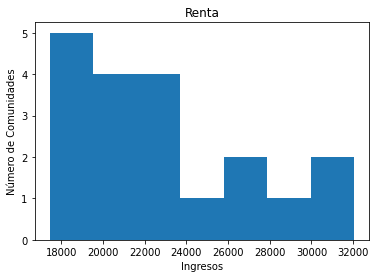

In [107]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

In [108]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta 
#      Apartado 1: Renta entre 26000€ y 28000€
#      Apartado 2: Renta superior a 30000€
apartado1 = Datos[(26000 < Datos['Renta']) & (Datos['Renta'] < 28000)]
apartado2 = Datos[30000 < Datos['Renta']]
apartado2

,Comunidad,Renta,DiferenciaRenta
12,MADRID,32048,-11.1
15,PAIS VASCO,30401,-10.4


¿Y si queremos visualizar la diferencia de ingresos?

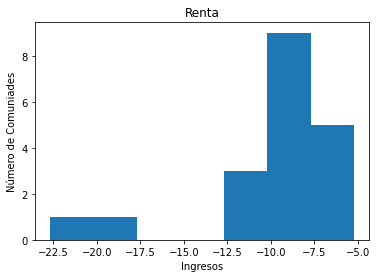

In [109]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [110]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal 

In [111]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola 
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato 
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [112]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [113]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [114]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [115]:
Datos.loc[outlier,"Comunidad"]

Series([], Name: Comunidad, dtype: object)

# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [116]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [117]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

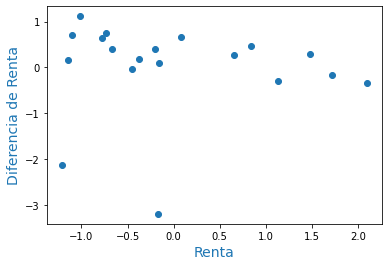

In [118]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()


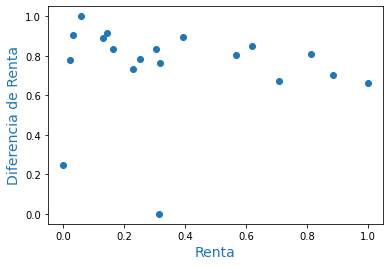

In [119]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

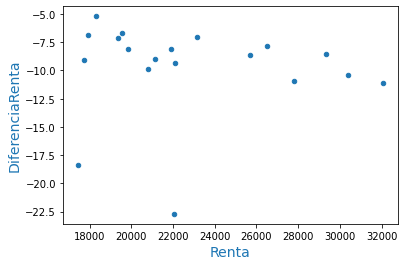

In [120]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)